# Overview

Practice how to do geocoding and spatial joins  in Python.

We will work with a practical case: the goal is to find out how many people live within 1.5 km (Euclidian) distance from big shopping centers in NYC.


```
├── GEOG485
│   ├── Code
│   │   ├── this notebook
│   ├── Data
│   │   ├── shopping_centers.txt (you will create this file and save it under here)
│   │   ├── nyc_shapefiles
│   │   │   ├── nyc_subway_stations.shp
│   │   │   ├── nyc_census_blocks.shp

```

Let's start by connecting to google drive and locating to our designated folder and install necessary libraries:

replace the nonimplemented code lines
replace non with your code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GEOG485/Code/') # change this to your folder if necessary

In [ ]:
! pip install geopandas
! pip install rtree
! pip install -U mapclassify

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 32.1 MB/s 
     |████████████████████████████████| 6.3 MB 72.3 MB/s 
     |████████████████████████████████| 994 kB 4.9 MB/s 


## Problem 1: Geocode shopping centers

The overall aim of problems 1-3 is to find out how many people live within a walking distance (1.5 km) from certain shopping centers in NYC.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Brookfield Place
 - Westfield World Trade Center
 - The Shops at Columbus Circle
 - Hudson Yards
 - Manhattan Mall
 - Showplace • Luxury • Art • Design • Vintage
 - SHOWFIELDS 

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 

See and example of how to format the text file `addresses.txt`. Save and upload the text file into your data folder.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:


In [ ]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Read the data (replace "None" with your own code)
fp = "../Data/shopping_centers.txt"
data = pd.read_csv(fp, sep=';')

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

NameError: ignored

In [ ]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

   id  ...                                   addr
0   1  ...       230 Vesey St, New York, NY 10281
1   2  ...   185 Greenwich St, New York, NY 10007
2   3  ...    10 Columbus Cir, New York, NY 10019
3   4  ...    30 Hudson Yards, New York, NY 10001
4   5  ...       00 W 33rd St, New York, NY 10001
5   6  ...       40 W 25th St, New York, NY 10010
6   7  ...         11 Bond St, New York, NY 10012

[7 rows x 3 columns]


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [ ]:
#import geocoding tool
from geopandas.tools import geocode
# Geocode the addresses using Nominatim
geo = geocode(data[' addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                     geometry                                            address
0  POINT (-74.01562 40.71232)  The Rink at Brookfield Place with Gregory & Pe...
1  POINT (-74.01165 40.71177)  Apple World Trade Center, 185, Greenwich Stree...
2  POINT (-73.98285 40.76825)  Per Se, 10, Columbus Circle, Manhattan, New Yo...
3  POINT (-74.00054 40.75391)  30 Hudson Yards, 30, 10th Avenue, Hudson Yards...
4  POINT (-73.99050 40.75009)  West 33rd Street, Herald Square, Manhattan, Ne...
5  POINT (-73.99106 40.74360)  40, West 25th Street, Manhattan Community Boar...
6  POINT (-73.99223 40.72571)  Bond Street, NoHo, Manhattan, New York, 10012,...


In [ ]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
geo
#to check

,geometry,address
0,POINT (-74.01562 40.71232),The Rink at Brookfield Place with Gregory & Pe...
1,POINT (-74.01165 40.71177),"Apple World Trade Center, 185, Greenwich Stree..."
2,POINT (-73.98285 40.76825),"Per Se, 10, Columbus Circle, Manhattan, New Yo..."
3,POINT (-74.00054 40.75391),"30 Hudson Yards, 30, 10th Avenue, Hudson Yards..."
4,POINT (-73.99050 40.75009),"West 33rd Street, Herald Square, Manhattan, Ne..."
5,POINT (-73.99106 40.74360),"40, West 25th Street, Manhattan Community Boar..."
6,POINT (-73.99223 40.72571),"Bond Street, NoHo, Manhattan, New York, 10012,..."


Check that the coordinate reference system of the geocoded result is correctly defined, and reproject the layer into UTM 18N (EPSG:26918):

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
#NON-EDITABLE TEST CELL
# Check layer crs
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Set the projection of 'geo' to 26918
geo = geo.to_crs('epsg:26918')

In [ ]:
#check whether the crs changed
geo.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata``

In [ ]:
# Join the tables
geodata = geo.join(data)


In [ ]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                         geometry  ...                                   addr
0  POINT (583147.497 4507288.276)  ...       230 Vesey St, New York, NY 10281
1  POINT (583483.345 4507230.975)  ...   185 Greenwich St, New York, NY 10007
2  POINT (585843.305 4513529.272)  ...    10 Columbus Cir, New York, NY 10019
3  POINT (584368.973 4511919.823)  ...    30 Hudson Yards, New York, NY 10001
4  POINT (585221.095 4511505.023)  ...       00 W 33rd St, New York, NY 10001

[5 rows x 5 columns]


In [ ]:
geodata.shape

(7, 5)

- Save the output as a Shapefile called `shopping_centers.shp` 

In [ ]:
# Define output filepath
out_fp = "../Data/shopping_centers.shp"

# Save file
geodata.to_file(out_fp)


In [ ]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: ../Data/shopping_centers.shp


## Problem 2: Create buffers around shopping centers

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [ ]:
geodata['buffer'] = geodata.buffer(1500)

In [ ]:
#check dataframe
geodata

,geometry,address,id,name,addr,buffer
0,POINT (583147.497 4507288.276),The Rink at Brookfield Place with Gregory & Pe...,1,Brookfield Place,"230 Vesey St, New York, NY 10281","POLYGON ((584647.497 4507288.276, 584640.274 4..."
1,POINT (583483.345 4507230.975),"Apple World Trade Center, 185, Greenwich Stree...",2,Westfield World Trade Center,"185 Greenwich St, New York, NY 10007","POLYGON ((584983.345 4507230.975, 584976.122 4..."
2,POINT (585843.305 4513529.272),"Per Se, 10, Columbus Circle, Manhattan, New Yo...",3,The Shops at Columbus Circle,"10 Columbus Cir, New York, NY 10019","POLYGON ((587343.305 4513529.272, 587336.082 4..."
3,POINT (584368.973 4511919.823),"30 Hudson Yards, 30, 10th Avenue, Hudson Yards...",4,Hudson Yards,"30 Hudson Yards, New York, NY 10001","POLYGON ((585868.973 4511919.823, 585861.750 4..."
4,POINT (585221.095 4511505.023),"West 33rd Street, Herald Square, Manhattan, Ne...",5,Manhattan Mall,"00 W 33rd St, New York, NY 10001","POLYGON ((586721.095 4511505.023, 586713.872 4..."
5,POINT (585181.965 4510784.896),"40, West 25th Street, Manhattan Community Boar...",6,Showplace Luxury Art Design Vintage,"40 W 25th St, New York, NY 10010","POLYGON ((586681.965 4510784.896, 586674.742 4..."
6,POINT (585105.637 4508797.488),"Bond Street, NoHo, Manhattan, New York, 10012,...",7,SHOWFIELDS,"11 Bond St, New York, NY 10012","POLYGON ((586605.637 4508797.488, 586598.414 4..."


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [ ]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                         geometry  ...                                             buffer
0  POINT (583147.497 4507288.276)  ...  POLYGON ((584647.497 4507288.276, 584640.274 4...
1  POINT (583483.345 4507230.975)  ...  POLYGON ((584983.345 4507230.975, 584976.122 4...
2  POINT (585843.305 4513529.272)  ...  POLYGON ((587343.305 4513529.272, 587336.082 4...
3  POINT (584368.973 4511919.823)  ...  POLYGON ((585868.973 4511919.823, 585861.750 4...
4  POINT (585221.095 4511505.023)  ...  POLYGON ((586721.095 4511505.023, 586713.872 4...

[5 rows x 6 columns]


In [ ]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [ ]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
import geopandas as gpd
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [ ]:
geodata['geometry'] = geodata['buffer']

In [ ]:
#check values
geodata

,geometry,address,id,name,addr,buffer
0,"POLYGON ((584647.497 4507288.276, 584640.274 4...",The Rink at Brookfield Place with Gregory & Pe...,1,Brookfield Place,"230 Vesey St, New York, NY 10281","POLYGON ((584647.497 4507288.276, 584640.274 4..."
1,"POLYGON ((584983.345 4507230.975, 584976.122 4...","Apple World Trade Center, 185, Greenwich Stree...",2,Westfield World Trade Center,"185 Greenwich St, New York, NY 10007","POLYGON ((584983.345 4507230.975, 584976.122 4..."
2,"POLYGON ((587343.305 4513529.272, 587336.082 4...","Per Se, 10, Columbus Circle, Manhattan, New Yo...",3,The Shops at Columbus Circle,"10 Columbus Cir, New York, NY 10019","POLYGON ((587343.305 4513529.272, 587336.082 4..."
3,"POLYGON ((585868.973 4511919.823, 585861.750 4...","30 Hudson Yards, 30, 10th Avenue, Hudson Yards...",4,Hudson Yards,"30 Hudson Yards, New York, NY 10001","POLYGON ((585868.973 4511919.823, 585861.750 4..."
4,"POLYGON ((586721.095 4511505.023, 586713.872 4...","West 33rd Street, Herald Square, Manhattan, Ne...",5,Manhattan Mall,"00 W 33rd St, New York, NY 10001","POLYGON ((586721.095 4511505.023, 586713.872 4..."
5,"POLYGON ((586681.965 4510784.896, 586674.742 4...","40, West 25th Street, Manhattan Community Boar...",6,Showplace Luxury Art Design Vintage,"40 W 25th St, New York, NY 10010","POLYGON ((586681.965 4510784.896, 586674.742 4..."
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...","Bond Street, NoHo, Manhattan, New York, 10012,...",7,SHOWFIELDS,"11 Bond St, New York, NY 10012","POLYGON ((586605.637 4508797.488, 586598.414 4..."


In [ ]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  ...                                             buffer
0  POLYGON ((584647.497 4507288.276, 584640.274 4...  ...  POLYGON ((584647.497 4507288.276, 584640.274 4...
1  POLYGON ((584983.345 4507230.975, 584976.122 4...  ...  POLYGON ((584983.345 4507230.975, 584976.122 4...
2  POLYGON ((587343.305 4513529.272, 587336.082 4...  ...  POLYGON ((587343.305 4513529.272, 587336.082 4...
3  POLYGON ((585868.973 4511919.823, 585861.750 4...  ...  POLYGON ((585868.973 4511919.823, 585861.750 4...
4  POLYGON ((586721.095 4511505.023, 586713.872 4...  ...  POLYGON ((586721.095 4511505.023, 586713.872 4...

[5 rows x 6 columns]


Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [ ]:
geodata.columns

Index(['geometry', 'address', 'id', ' name', ' addr', 'buffer'], dtype='object')

In [ ]:
geodata_n= geodata[['geometry', 'id', ' name']]

## Problem 3: How many people live near shopping centers? 

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the `nyc_census_blocks.shp` for population information.

The coordinate reference system of the population data is **UTM 18N (EPSG:26918)**.

**Steps:**

- Read the population data into a geodataframe

- Select only the useful columns from the population data: ``'POPN_TOTAL'`` and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population layer. Join the information now from buffer layer **into the population layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center.

**Final print out should contain both the shopping center name and population count**, for example: `26532 people live within 1.5 km from Brookfield Place`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

intersect with buffer area
join census with buffer layer
so we have both shopping centre name and layer

In [ ]:
# Read population data into a variable `pop`. 
pop = gpd.read_file("/content/drive/MyDrive/GEOG485/Data/nyc_shapefiles/nyc_census_blocks.shp")

In [ ]:
# Remember to check the crs info! 
pop.crs
# crs is the same as the geodataset

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 38794
             BLKID  ...                                           geometry
0  360850009001000  ...  POLYGON ((577856.547 4499583.235, 577862.635 4...
1  360850020011000  ...  POLYGON ((578620.717 4495974.818, 578535.358 4...
2  360850040001000  ...  POLYGON ((577227.224 4495995.067, 577155.625 4...

[3 rows x 9 columns]


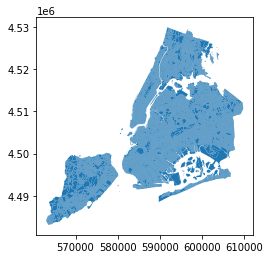

In [ ]:
# to see the plot
pop.plot()

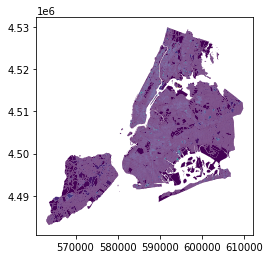

In [ ]:
#population distribution
pop.plot(column = 'POPN_TOTAL')

In [ ]:
# since we need only pop_total and geometr
pop=pop[['POPN_TOTAL', 'geometry']]

In [ ]:
# print pop to check
pop

,POPN_TOTAL,geometry
0,97,"POLYGON ((577856.547 4499583.235, 577862.635 4..."
1,66,"POLYGON ((578620.717 4495974.818, 578535.358 4..."
2,62,"POLYGON ((577227.224 4495995.067, 577155.625 4..."
3,137,"POLYGON ((579037.033 4494421.770, 579000.015 4..."
4,289,"POLYGON ((577652.483 4494975.052, 577681.914 4..."
...,...,...
38789,328,"POLYGON ((592015.668 4526716.910, 591988.060 4..."
38790,0,"POLYGON ((592141.936 4526852.139, 592112.564 4..."
38791,0,"POLYGON ((594123.287 4525906.396, 594213.566 4..."
38792,480,"POLYGON ((591982.370 4523793.569, 591849.992 4..."


In [ ]:
join = gpd.sjoin(geodata_n, pop, how = 'inner', predicate='intersects')

In [ ]:
join

,geometry,id,name,index_right,POPN_TOTAL
0,"POLYGON ((584647.497 4507288.276, 584640.274 4...",1,Brookfield Place,18118,148
1,"POLYGON ((584983.345 4507230.975, 584976.122 4...",2,Westfield World Trade Center,18118,148
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...",7,SHOWFIELDS,18118,148
0,"POLYGON ((584647.497 4507288.276, 584640.274 4...",1,Brookfield Place,1535,0
1,"POLYGON ((584983.345 4507230.975, 584976.122 4...",2,Westfield World Trade Center,1535,0
...,...,...,...,...,...
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...",7,SHOWFIELDS,18161,0
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...",7,SHOWFIELDS,32446,643
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...",7,SHOWFIELDS,26786,446
6,"POLYGON ((586605.637 4508797.488, 586598.414 4...",7,SHOWFIELDS,16681,473


In [ ]:
total_pop_int_centre =join.groupby(' name').size().reset_index()
total_pop_int_centre

,name,0
0,Brookfield Place,419
1,Hudson Yards,322
2,Manhattan Mall,516
3,SHOWFIELDS,740
4,Showplace Luxury Art Design Vintage,555
5,The Shops at Columbus Circle,385
6,Westfield World Trade Center,480


In [ ]:
join.columns

Index(['BLKID', 'POPN_TOTAL', 'POPN_WHITE', 'POPN_BLACK', 'POPN_NATIV',
       'POPN_ASIAN', 'POPN_OTHER', 'BORONAME', 'geometry', 'index_right', 'id',
       ' name'],
      dtype='object')

In [ ]:
# correlation between total population and name
total_pop_int_centre =join.groupby(' name').size().reset_index()
total_pop_int_centre

,name,0
0,Brookfield Place,419
1,Hudson Yards,322
2,Manhattan Mall,516
3,SHOWFIELDS,740
4,Showplace Luxury Art Design Vintage,555
5,The Shops at Columbus Circle,385
6,Westfield World Trade Center,480
